# Yandex Afisha Business Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the csv file
try:
    visits = pd.read_csv('visits_log_us.csv')
    orders = pd.read_csv('orders_log_us.csv')
    costs = pd.read_csv('costs_us.csv')
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv')
    orders = pd.read_csv('/datasets/orders_log_us.csv')
    costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:
def data_info(data):
    """This function helps simplify reading multiple datasets.
    
    This function takes the dataset variable as input and 
    produces the general information about each dataset, 
    including description, duplicates and missing values."""
    print('General dataset information:')
    print(data.info())
    print()
    print('First five rows:')
    print(data.head())
    print()
    print('Description of the dataset:')
    print(data.describe())
    print()
    print('This dataset has {} duplicates.'.format(data.duplicated().sum()))
    print()
    print('How many missing values does this data have?')
    print(data.isna().sum())
    print()
    print('What is the percentage of the missing values?')
    print(data.isna().sum() / len(data))

## Introduction
<a name="introduction"></a>

Three datasets have been provided by Yandex Afisha, entertainment ticket sales service based in Russia, for analysis of the company's business. The datasets include: server logs with data on Yandex.Afisha visits from June 2017 through May 2018, dump file with all orders for the period, as well as marketing expenses statistics.

The datasets will be processed to avoid or minimise skewed analysis, exploratory data analysis will be conducted and business analysis will be done in order to reach some conclusions. This report will consist of the following:

1. General information on the dataset
2. Data preprocessing stages, removing duplicates, categorising data and adding other relevant variables
3. Exploratory data analysis on the user's visit, order and marketing costs data
4. Business analysis that will include user retention, LTV, CAC and ROMI

Based on the conclusions drawn in this report, Yandex Afisha business executives will understand:
- How users visit the website and use the service
- When users become customer by purchasing tickets
- How much money each customer brings
- When the marketing expenses pay off

### Table of contents
1. [Introduction](#introduction)
2. [Session Analysis](#sessions)
3. [Sales Analysis](#sales)
4. [Marketing Analysis](#marketing)
5. [Conclusion](#conclusion)

In [4]:
data_info(visits)

General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None

First five rows:
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   74590356033

In [5]:
data_info(orders)

General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

First five rows:
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

Description of the dataset:
            Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e

In [6]:
data_info(costs)

General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None

First five rows:
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

Description of the dataset:
         source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000

This dataset has 0 duplicates.

How many missing values does this dat

1. There are 3 datasets. Every dataset is saved as a variable: visits, orders and costs.
2. Visit has 359400 rows, every row represents one server log with data on website visits, duration, and the source where users find the website.
3. Order has 50415 rows, every row represents one order, when the users make a purchase and how much are they spending on each order.
4. Costs has 2542 rows, every row represents one marketing expense when users enter the website through an ad.
5. We will need to change the column name formatting for ease of analysis, as well as changing the data types of some columns.

### Data Preprocessing

In [7]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()

In [8]:
visits.columns = visits.columns.str.replace(' ', '_')
orders.columns = orders.columns.str.replace(' ', '_')

In [10]:
print(visits.columns)
print(orders.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')
Index(['buy_ts', 'revenue', 'uid'], dtype='object')


In [11]:
visits['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [12]:
visits['device'] = visits['device'].astype('category')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format="%Y%m%d %H:%M")
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y%m%d %H:%M")
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format="%Y%m%d %H:%M")
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y%m%d %H:%M")

## Session Analysis
<a name="sessions"></a>

In this section, we will look into users' sessions and activities in Yandex Afisha. Based on that, we can find the following:
1. The amount of people using it daily, weekly and monthly;
2. The amount of sessions per users of every time period;
3. The length of each of these sessions.

In [13]:
visits['date'] = visits['start_ts'].astype('datetime64[D]')
visits['week'] = visits['start_ts'].astype('datetime64[W]')
visits['month'] = visits['start_ts'].astype('datetime64[M]')
visits['year'] = visits['start_ts'].astype('datetime64[Y]')

In [14]:
dau = (
    visits.groupby(['date'])
    .agg({'uid': 'nunique'})
    .mean()
)

wau = (
    visits.groupby(['year', 'week'])
    .agg({'uid': 'nunique'})
    .mean()
)

mau = (
    visits.groupby(['year', 'month'])
    .agg({'uid': 'nunique'})
    .mean()
)

print('Average users per day is:', int(dau))
print('Average users per week is:', int(wau))
print('Average users per month is:', int(mau))

Average users per day is: 907
Average users per week is: 5621
Average users per month is: 23228


Based on the first glance at the data, we find that average daily active users is 907 users. Based on that, there supposed to be around 5400 users per week, but the weekly average is higher (5716). The monthly average is a bit less at 23228, when we compare it to the daily average, there should be around 27000 users. This might be because some users may use it more often some days and come for several visits throughout the month.

To understand more about users' sessions, we shall take a look at each time frame.

#### Monthly Sessions

In [15]:
monthly_sessions = (visits
                     .groupby('month')
                     .agg({'uid': ['count', 'nunique']})
                    )
monthly_sessions.columns = ['n_sessions', 'n_users']
monthly_sessions['session_per_user'] = monthly_sessions['n_sessions'] / monthly_sessions['n_users']

In [16]:
monthly_sessions = monthly_sessions.reset_index()

In [17]:
monthly_sessions['order_month'] = monthly_sessions['month'].dt.strftime('%Y-%m')

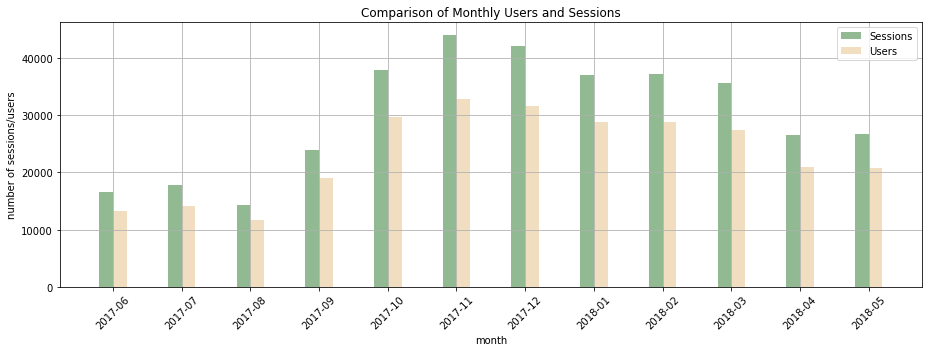

In [22]:
labels = monthly_sessions['order_month'].unique()
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(13,5))
g1 = ax.bar(x - width/2, monthly_sessions['n_sessions'], width, color='#92BA92', label='Sessions')
g2 = ax.bar(x + width/2, monthly_sessions['n_users'], width, color='#F1DDBF', label='Users')

plt.title("Comparison of Monthly Users and Sessions")
plt.xlabel('month')
plt.ylabel('number of sessions/users')
plt.xticks(rotation=45)
plt.grid()

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show();

Based on the bar chart, we can see that June-August 2017 have the lowest visits, under 20000 sessions and unique users. November 2017 shows the highest visits at more than 40000 sessions and 30000 unique users.

#### Weekly Sessions

In [23]:
weekly_sessions = (visits
                     .groupby('week')
                     .agg({'uid': ['count', 'nunique']})
                    )
weekly_sessions.columns = ['n_sessions', 'n_users']
weekly_sessions['session_per_user'] = weekly_sessions['n_sessions'] / weekly_sessions['n_users']

In [24]:
weekly_sessions = weekly_sessions.reset_index()

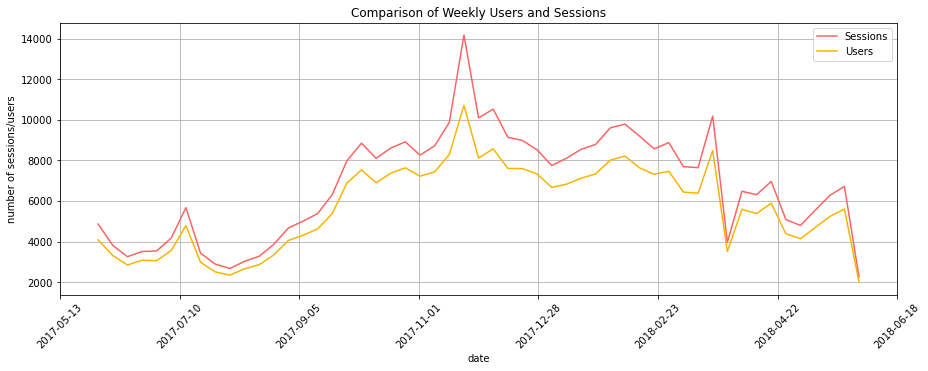

In [27]:
plt.figure(figsize=(15,5))
plt.plot(weekly_sessions['week'], weekly_sessions['n_sessions'], color='#FF6363')
plt.plot(weekly_sessions['week'], weekly_sessions['n_users'], color='#F8B400')

plt.title('Comparison of Weekly Users and Sessions')
plt.ylabel('number of sessions/users')
plt.xlabel('date')

plt.legend(['Sessions', 'Users'])
xmin, xmax = plt.xlim()
plt.xticks(np.linspace(xmin, xmax, 8), rotation=45)
plt.grid()
plt.show();

Based on the weekly chart, the peak of visits is at around the 2nd and 3rd week of November 2017. While throughout May 2017-June 2018, the weekly visits is always below 10000 visits. The visit is hitting all time low in the 3rd and 4th week of July 2017 at just above 2000 visits.

#### Daily Sessions

In [28]:
daily_sessions = (visits
                     .groupby('date')
                     .agg({'uid': ['count', 'nunique']})
                    )
daily_sessions.columns = ['n_sessions', 'n_users']
daily_sessions = daily_sessions.reset_index()
daily_sessions['session_per_user'] = daily_sessions['n_sessions'] / daily_sessions['n_users']

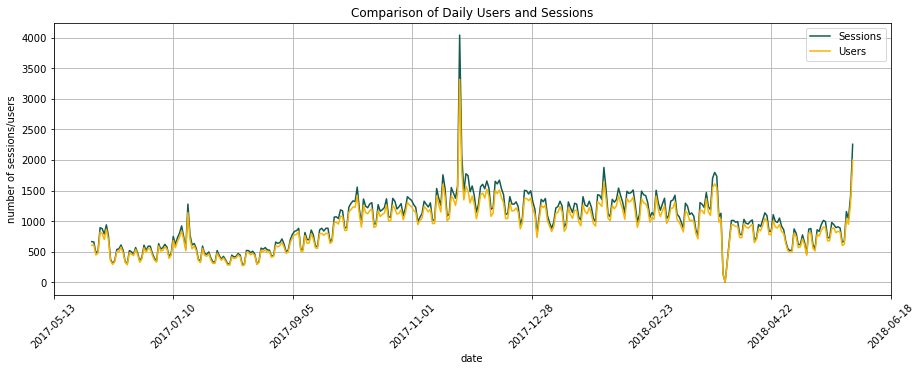

In [31]:
plt.figure(figsize=(15,5))
plt.plot(daily_sessions['date'], daily_sessions['n_sessions'], color='#125B50')
plt.plot(daily_sessions['date'], daily_sessions['n_users'], color='#F8B400')

plt.title('Comparison of Daily Users and Sessions')
plt.ylabel('number of sessions/users')
plt.xlabel('date')

plt.legend(['Sessions', 'Users'])
xmin, xmax = plt.xlim()
plt.xticks(np.linspace(xmin, xmax, 8), rotation=45)
plt.grid()
plt.show();

On the daily chart, the highest visit is on November 24, 2017, at close to 4000 visits in a day. The second highest is on May 31, 2018, that is the last day of the dataset time frame. The lowest visit is on March 31, 2018 with only 1 visit. There might be an error on the website that day as it is abnormally low.

### Duration

In [32]:
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

There are some visits that have a duration of 0 seconds, there might be an error with these visits -- it could be the user's network connection or the user closes the tab before the page loads. Before ignoring them, we should check how much is the percentage of these visits in the dataset.

In [33]:
len(visits.loc[visits['duration'] == 0]) / len(visits)

0.0995937673900946

It's slightly less than 10% of the total data, not big but also not too small. We can create a separate variable to check if the values will be different.

In [34]:
long_visit = visits.query('duration > 0')

In [35]:
asl = long_visit['duration'].mode()
asl_zero = visits['duration'].mode()
print(asl)
print(asl_zero)

0    60
dtype: int64
0    60
dtype: int64


Based on the calculation, when we ignore the 0 second visits, the average session length is still the same as when we take into account the 0 second visits. The average session length is 1 minute, which is quite fast for users to make a purchase, we can later see how many of those 1 minute visits sales.

In [36]:
visits['duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duration, dtype: float64

The lower quartile of session length is 2 minutes, just a minute longer than the average session length. The median is 5 minutes, this is reasonable as some user takes longer to choose which event to attend. 

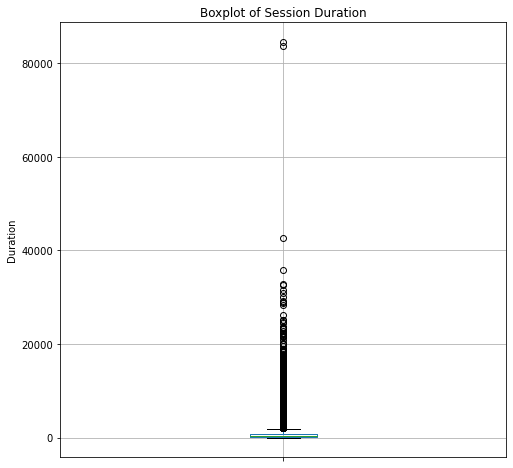

In [38]:
visits['duration'].plot(kind='box', figsize=(8,8), grid=True)
plt.xticks([1], [])
plt.title('Boxplot of Session Duration')
plt.ylabel('Duration');

On the boxplot, there are some user sessions of up to 80000 seconds (22 hours). It is possible that they forgot to close the tab to end the session or some other error bug in the website. 

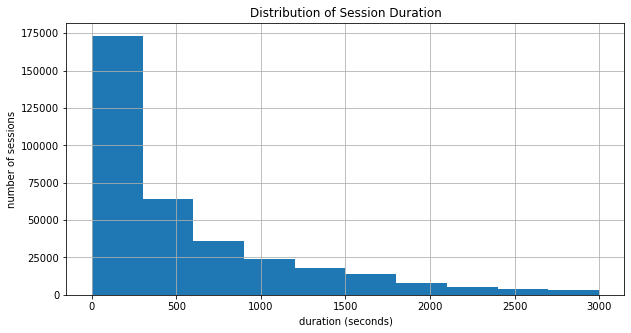

In [40]:
visits['duration'].plot(kind='hist', figsize=(10,5), range=(0,3000), grid=True)
plt.title('Distribution of Session Duration')
plt.xlabel('duration (seconds)')
plt.ylabel('number of sessions');

Based on the histogram, more than 175000 sessions (nearly half of all sessions) are below 4 minutes and the graph continues to decrease significantly afterwards.

#### Duration Based on Device

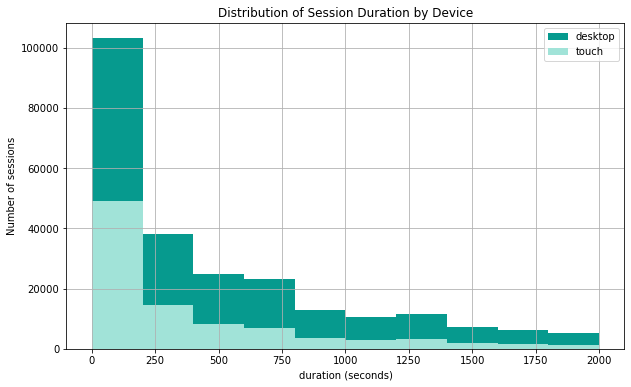

In [41]:
desktop = visits.query('device=="desktop"')
touch = visits.query('device=="touch"')

desktop['duration'].hist(bins=10, figsize=(10,6), range=(0, 2000), color='#069A8E', label='desktop')
touch['duration'].hist(bins=10, figsize=(10,6), range=(0, 2000), color='#A1E3D8', label='touch')
plt.title('Distribution of Session Duration by Device')
plt.xlabel('duration (seconds)')
plt.ylabel('Number of sessions')
plt.legend()
plt.show();

Based on the histogram above, more users are visiting the website using desktop. Users spend similar time when visiting on desktop or touch devices (phones or tablets), most of them spend less than 4 minutes each session.

#### Multiple User Sessions

In [42]:
sess_per_day = visits.pivot_table(index='date',
                           values='uid',
                           aggfunc='count')
sess_per_day = sess_per_day.reset_index()
sess_per_day.head()

,date,uid
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893


In [46]:
daily_sessions = visits.groupby(['date','uid'])['date'].count()

In [49]:
daily_sessions[np.where(daily_sessions.values > 1)[0]].sort_values(ascending=False).head(10)

date        uid                 
2018-02-28  12869801667763685675    10
2018-01-29  10246903932085021612    10
2017-11-28  18295771519195086861     9
2018-01-24  12869801667763685675     9
2018-05-08  6166747268563050393      9
2018-02-15  10403169074343195591     9
2018-05-12  6166747268563050393      9
2017-06-26  8056418121947262981      9
2018-02-19  12869801667763685675     9
2018-01-05  16025330412771308483     9
Name: date, dtype: int64

From the previous graphs, users can have multiple sessions in a day. We found that certain users sometimes make 10 visits in a day, it might be interesting to look into why they have to come back so much, maybe they didn't succeed in purchasing a ticket due to an error in the website that day.

### Retention

In this section, we are taking the sessions analysis a step further and see how many users are coming back to the website. We will divide the users based on cohort and see the retention rate based on each cohort.

In [50]:
print('The percentage of users coming back to the website in a week is: {:.2%}'.format(int(dau) / int(wau)))
print('The percentage of users coming back to the website in a month is: {:.2%}'.format(int(dau) / int(mau)))

The percentage of users coming back to the website in a week is: 16.14%
The percentage of users coming back to the website in a month is: 3.90%


Users come back more on a weekly than monthly time frame. This might be because a show or events plays in a shorter time period (e.g. a few days) and if one day it's sold out, users try coming back the next day to purchase the ticket again.

In [51]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
first_activity_date = visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'

activity = visits.join(first_activity_date,on='uid')
activity['first_activity_date'] = pd.to_datetime(activity['first_activity_date']).dt.normalize()

In [52]:
activity['start_ts'] = activity['start_ts'].astype('datetime64[D]')
activity['activity_month'] = activity['start_ts'].astype('datetime64[M]')
activity['first_activity_month'] = activity['first_activity_date'].astype('datetime64[M]')

In [53]:
activity['cohort_lifetime'] = activity['activity_month'] - activity['first_activity_month']
activity['cohort_lifetime'] = activity['cohort_lifetime'] / np.timedelta64(1,'M')
activity['cohort_lifetime'] = activity['cohort_lifetime'].round().astype(int)

In [54]:
cohorts = activity.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [55]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

In [56]:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

In [57]:
retention = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum'
)

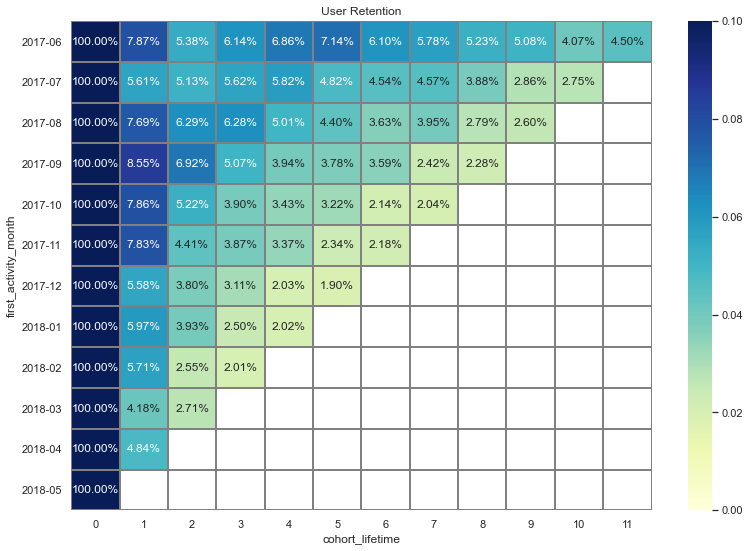

In [58]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('User Retention')
sns.heatmap(
    retention, 
    vmin=0,
    vmax=0.1,
    annot=True, 
    fmt='.2%', 
    linewidths=1, 
    linecolor='gray', 
    cmap="YlGnBu"
).set_yticklabels(retention.index.strftime('%Y-%m'))
norm = plt.Normalize(-100,100)

plt.show();

Upon checking the user retention rate, we can see the highest rate on the 2nd month of September 2017 (8.55%) and June 2017 (7.87%) cohorts. Most cohorts' retention rate gradually decreases as the lifetime goes, although the June 2017 cohorts sees an increase until the 6th month before decreasing.

### Visits Conclusion

1. In this section, we have analysed users' session counts, sessions duration and how often do users come back by looking at the users' retention rate.
2. We found the average daily users (907), weekly users (5621), and monthly users (23228). On every time period, sessions are always higher than unique users count, which means that some users come back for several sessions in a given time period.
3. Most users spend 60 seconds in each session. There are abnormal session length, such as sessions that are 0 seconds and sessions that lasts for nearly a whole day (22 hours).
4. Some users come back often to the website, sometimes up to 10 times in a day, which may be interesting to look into, as there might be an error on the website that day.
5. We divide the users into monthly cohorts and analyse their retention rate. On the second month of their visits, their retention rate is ranging between 4-9%, then mostly it continues to decrease on the third month and so on. Except the June 2017 cohort, their retention rate increases from the 3rd until 6th month before decreasing.

## Sales Analysis
<a name="sales"></a>

In this section, we will look into the orders made in Yandex Afisha platform. We will eventually divide the customers' based on monthly cohort and see if there is any spending pattern. From the analysis, we will find out:
1. The length of time between registration and conversion.
2. The amount and size of orders made during a given period of time.
3. The total amount each customer brings during their time as Yandex Afisha customer (Lifetime Value).

In [59]:
first_order_dates = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_order_dates.columns= ['uid','first_order_date']

first_session_dates = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_session_dates.columns= ['uid','first_session_date']
 
conversion = pd.merge(first_session_dates, first_order_dates, on='uid')
 
conversion['conversion_time_days'] = (conversion['first_order_date'] - conversion['first_session_date']).dt.days
 
avg_conversion_time = conversion['conversion_time_days'].mean()

total_visitor = (visits['uid']).nunique()
total_purchaser = (conversion['uid']).nunique()
converted = total_purchaser / total_visitor

print('Total users that visit the webpage is', total_visitor, 'users')
print('Total users that have made a purchase is', total_purchaser, 'users')
print('The conversion rate is {:.2%}'.format(converted))
print("On average, {:.0f} days elapsed from user's first session until their first order".format(avg_conversion_time))

Total users that visit the webpage is 228169 users
Total users that have made a purchase is 36523 users
The conversion rate is 16.01%
On average, 17 days elapsed from user's first session until their first order


In [60]:
conversion['first_session_month'] = conversion['first_session_date'].astype('datetime64[M]')

In [63]:
conversion.head()

,uid,first_session_date,first_order_date,conversion_time_days,first_session_month
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106,2017-09-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0,2017-11-01


In [66]:
bins = [-1, 0, 7, 14, 30, 364]
labels = ['0d', '7d', '14d', '30d', '31+d']

conversion['conversion_time'] = pd.cut(conversion['conversion_time_days'], bins=bins, labels=labels)

In [69]:
conversion_cohorts = conversion.groupby(['first_session_month','conversion_time']).agg({'uid':'nunique'}).reset_index()

In [73]:
total_conversion = conversion_cohorts.pivot_table(
    index='first_session_month',
    columns='conversion_time',
    values='uid',
    aggfunc='sum'
)
total_conversion = total_conversion.reindex(['0d','7d', '14d','30d','31+d'], axis=1)

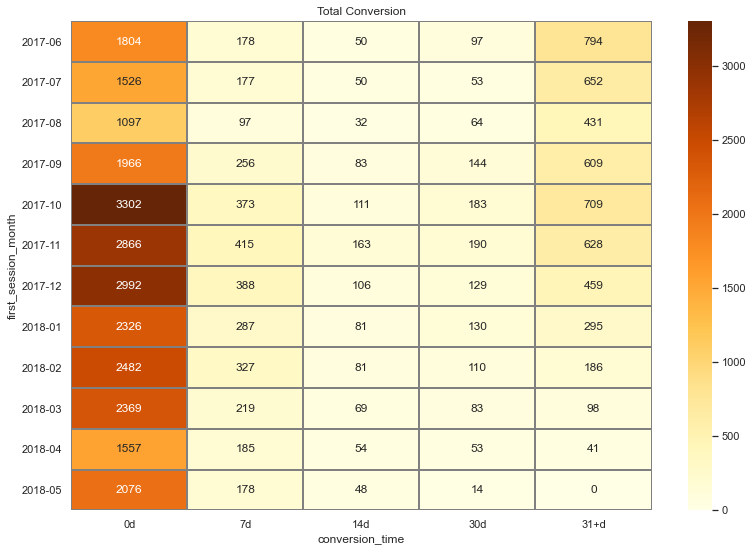

In [75]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Total Conversion')
sns.heatmap(
    total_conversion,
    annot=True, 
    fmt='.0f', 
    linewidths=1, 
    linecolor='gray', 
    cmap="YlOrBr"
).set_yticklabels(total_conversion.index.strftime('%Y-%m'))
norm = plt.Normalize(-100,100)

plt.show();

In [76]:
zero = conversion.query('conversion_time == "0d"').count()['uid']/(visits['uid']).nunique()
seven = conversion.query('conversion_time == "7d"').count()['uid']/(visits['uid']).nunique()
fourteen = conversion.query('conversion_time == "14d"').count()['uid']/(visits['uid']).nunique()
thirty = conversion.query('conversion_time == "30d"').count()['uid']/(visits['uid']).nunique()
long = conversion.query('conversion_time == "31+d"').count()['uid']/(visits['uid']).nunique()

print('The percentage of users who make a purchase on the same day as their first visit is: {:.2%}'.format(zero))
print('The percentage of users who make a purchase within 7 days after their first visit is: {:.2%}'.format(seven))
print('The percentage of users who make a purchase within 14 days after their first visit is: {:.2%}'.format(fourteen))
print('The percentage of users who make a purchase within 30 days after as their first visit is: {:.2%}'.format(thirty))
print('The percentage of users who make a purchase more than 30 days after their first visit is: {:.2%}'.format(long))

The percentage of users who make a purchase on the same day as their first visit is: 11.55%
The percentage of users who make a purchase within 7 days after their first visit is: 1.35%
The percentage of users who make a purchase within 14 days after their first visit is: 0.41%
The percentage of users who make a purchase within 30 days after as their first visit is: 0.55%
The percentage of users who make a purchase more than 30 days after their first visit is: 2.15%


Although the calculation above shows that, on average, it takes 17 days from a user's first visit until they make a purchase, on the heatmap we can see that most of the users are converted on the same day as their first visit. The heatmap also shows that not many users convert 14-30 days since their first visit. We can also see on the second calculation that less than 1% of users are converted within 14-30 days since their first visit.

### Periodical Orders

In [77]:
orders['year']  = orders['buy_ts'].astype('datetime64[Y]')
orders['month'] = orders['buy_ts'].astype('datetime64[M]')
orders['week']  = orders['buy_ts'].astype('datetime64[W]')
orders['date'] = orders['buy_ts'].astype('datetime64[D]')

In [78]:
total_orders = orders.merge(visits, on=['uid', 'date', 'month', 'week', 'year']).drop_duplicates()

In [79]:
total_orders['revenue'].min()

0.0

We have some orders with $0 revenue, so we will ignore that for the analysis

In [80]:
total_orders = total_orders.query('revenue > 0')

#### Daily Orders

In [81]:
daily_orders = total_orders.groupby('date').agg({'uid': ['count', 'nunique']}).reset_index()
daily_orders.columns = ['date', 'n_purchases', 'n_users']

In [82]:
daily_orders['order_date'] = daily_orders['date'].dt.strftime('%Y-%m-%d')

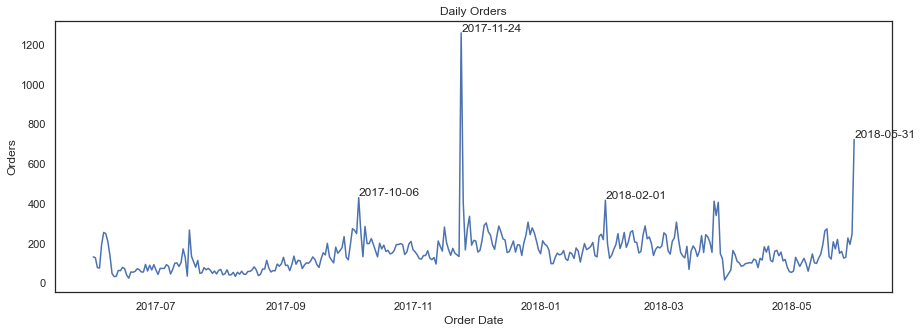

In [83]:
plt.figure(figsize=(15,5))
plt.title('Daily Orders')
plt.xlabel('Order Date')
plt.ylabel('Orders')

sns.set_style("whitegrid")
sns.lineplot(data=daily_orders, x="date", y="n_purchases", legend='full')

slider = 10
for i in range(daily_orders.shape[0]):
    if daily_orders['n_purchases'].iloc[i] > 410:
        plt.text(daily_orders.date.iloc[i], 
                 daily_orders['n_purchases'].iloc[i] + slider,  
                 daily_orders['order_date'].iloc[i])

plt.show();

The peak order is in November 24, 2017, with other heavy orders (more than 400) coming on October 6, 2017, February 1, 2018, and May 31, 2018. The orders have stable fluctuations between 200 and 400 daily orders except the spikes that were mentioned.

#### Weekly Orders

In [84]:
weekly_orders = total_orders.groupby('week').agg({'uid': ['count', 'nunique']}).reset_index()
weekly_orders.columns = ['week', 'n_purchases', 'n_users']

In [85]:
weekly_orders['order_week'] = weekly_orders['week'].dt.strftime('%Y-%m-%d')

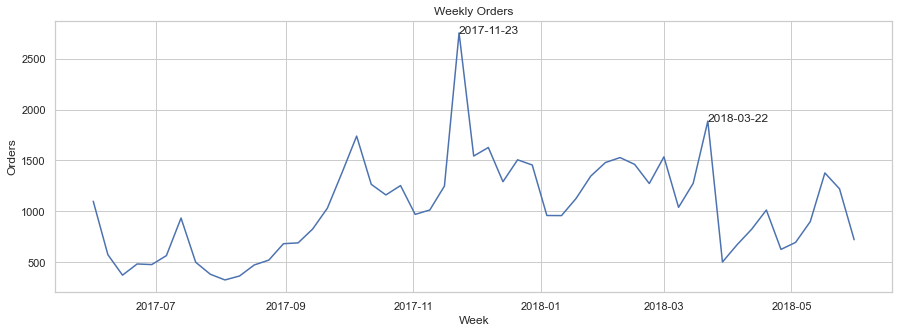

In [86]:
plt.figure(figsize=(15,5))
plt.title('Weekly Orders')
plt.xlabel('Week')
plt.ylabel('Orders')

sns.set_style("whitegrid")
sns.lineplot(data=weekly_orders, x='week', y='n_purchases', legend='full')

slider = 0.05
for i in range(weekly_orders.shape[0]):
    if weekly_orders['n_purchases'].iloc[i] > 1750:
        plt.text(weekly_orders.week.iloc[i], 
                 weekly_orders['n_purchases'].iloc[i] + slider,  
                 weekly_orders['order_week'].iloc[i])
        

plt.show();

The order peaks at the 3rd week of November and 3rd week of March, while the lowest order is at the 2nd week of August. Other than that the order fluctuates between 500 to 1500 orders per week.

#### Monthly Orders

In [87]:
monthly_orders = total_orders.groupby('month').agg({'uid': ['count', 'nunique']}).reset_index()
monthly_orders.columns = ['month', 'n_purchases', 'n_users']

In [88]:
monthly_orders['order_month'] = monthly_orders['month'].dt.strftime('%Y-%m')

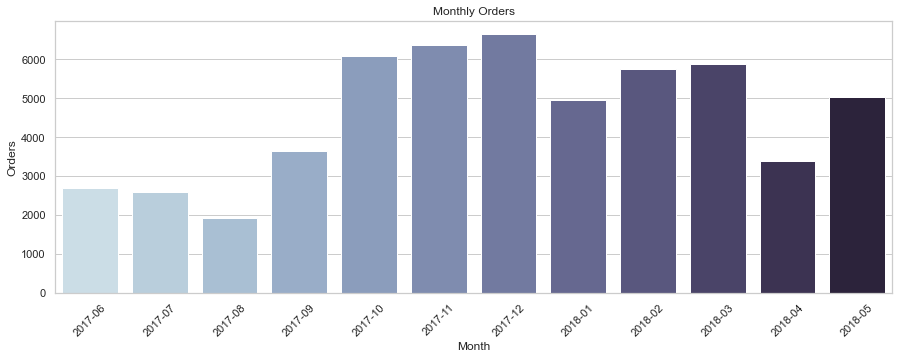

In [90]:
plt.figure(figsize=(15,5))
plt.title('Monthly Orders')

sns.set_style("whitegrid")
sns.barplot(data=monthly_orders, 
            x='month', 
            y='n_purchases', 
            palette="ch:s=.25,rot=-.25").set_xticklabels(monthly_orders.order_month)

plt.xlabel('Month')
plt.ylabel('Orders')
plt.xticks(rotation=45)
plt.show();

The highest monthly orders are in October-December (more than 6000 orders) and the lowest are June-August (less than 3000 orders). The other months tend to fluctuate between 3000-6000. Based on the charts, we can also see that the amount of orders are aligned with the amount of user sessions. 

### Purchase Size

In [91]:
orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [92]:
revenue_mode = orders['revenue'].mode()
print('The average purchase amount is ${:.2f}'.format(float(revenue_mode)))

The average purchase amount is $1.83


The mean of the purchase is \\$4.99, much higher than the median of \\$2.5 and the real average of \\$1.83. We might need to slice the data and remove the outliers to minimise skewed analysis.

#### Daily Purchase Size

In [93]:
filtered_orders = orders.query('revenue < 5')

In [94]:
filtered_orders['revenue'].describe()

count    38428.000000
mean         2.144567
std          1.321439
min          0.000000
25%          1.100000
50%          1.830000
75%          3.050000
max          4.970000
Name: revenue, dtype: float64

Now the mean is closer to the real average of \\$1.83 and the median is exactly the same.

In [95]:
daily_purchase = filtered_orders.pivot_table(index='date',
                                          values='revenue',
                                          aggfunc=['sum', 'mean']).reset_index()

daily_purchase.columns = ['date', 'total_purchase', 'avg_purchase']

In [96]:
daily_purchase['order_date'] = daily_purchase['date'].dt.strftime('%Y-%m-%d')

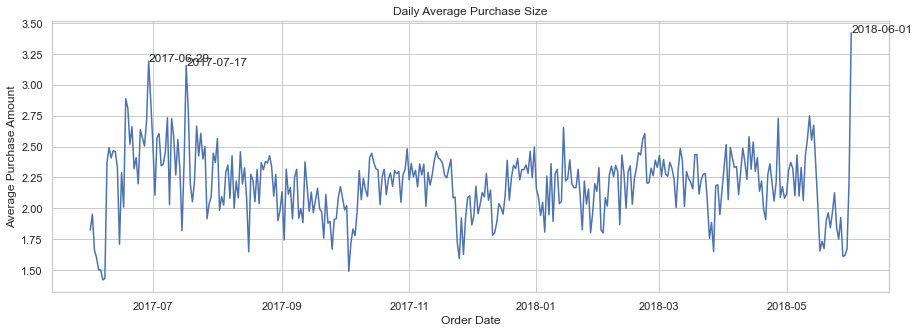

In [100]:
plt.figure(figsize=(15,5))
plt.title('Daily Average Purchase Size')
plt.xlabel('Order Date')
plt.ylabel('Average Purchase Amount')

sns.set_style("whitegrid")
sns.lineplot(data=daily_purchase, x="date", y="avg_purchase", legend='full')

slider = 0.001
for i in range(daily_purchase.shape[0]):
    if daily_purchase['avg_purchase'].iloc[i] > 3:
        plt.text(daily_purchase.date.iloc[i], 
                 daily_purchase['avg_purchase'].iloc[i] + slider,  
                 daily_purchase['order_date'].iloc[i])

plt.show();

From the line chart, average daily purchase fluctuates between \\$1.75 to \\$2.75. There are 3 peaks, June 1, 2018, June 29, 2017 and July 17, 2017, where the average is more than \\$3.

### Lifetime Value of Customers

First, we need to find out the first order date and month of each customer to find their lifetime as a customer of Yandex Afisha.

In [101]:
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_date']

In [102]:
first_orders['first_order_date'] = first_orders['first_order_date'].dt.date
first_orders['first_order_month'] = first_orders['first_order_date'].astype('datetime64[M]')

In [103]:
orders = orders.merge(first_orders, on ='uid')

Then, we need to find the amount of unique purchasers and sum of revenue in each cohort.

In [104]:
cohort_size = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_size.columns = ['first_order_month','n_purchasers']

In [105]:
cohort_revenue = orders.groupby(['first_order_month', 'month']).agg({'revenue': 'sum'}).reset_index()

In [106]:
total_revenue = pd.merge(cohort_size, cohort_revenue, on='first_order_month')

In [112]:
total_revenue.head()

,first_order_month,n_purchasers,month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


In [107]:
total_revenue['age'] = (total_revenue['month'] -
                         total_revenue['first_order_month']) / np.timedelta64(1, 'M')
total_revenue['age'] = total_revenue['age'].round().astype('int')

Once we found the customers' cohort/age, we can calculate the lifetime value of the customers by dividing the revenue to number of customers in such cohort.

In [108]:
total_revenue['ltv'] = total_revenue['revenue'] / total_revenue['n_purchasers']

In [109]:
ltv_pivot = total_revenue.pivot_table(
    index='first_order_month',
    columns='age',
    values='ltv', 
    aggfunc='mean')

In [110]:
ltv_pivot_sum = ltv_pivot.cumsum(axis=1)

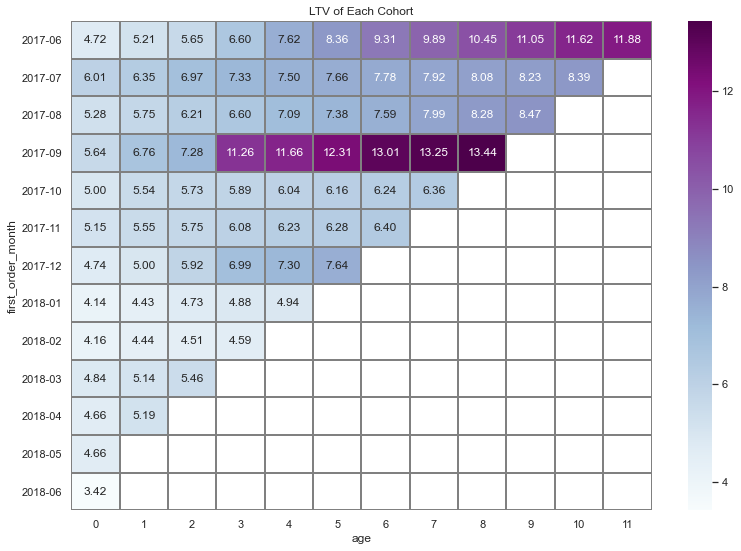

In [111]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV of Each Cohort')

sns.heatmap(
    ltv_pivot_sum, 
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    linecolor='gray', 
    cmap="BuPu"
).set_yticklabels(ltv_pivot_sum.index.strftime('%Y-%m'))

plt.show()

We plot the LTV heatmap, where the average LTV of the customers is based on their first order and every month following their first order. We found that the most profitable was September 2017 cohort, where their LTV reaches \\$13.44. The second most profitable cohort is June 2017 cohort, with LTV of \\$11.88. Other cohorts has LTV of less than \\$9.

#### LTV of Each Age 

In [113]:
age_ltv = ltv_pivot_sum.mean(axis=0).reset_index()
age_ltv.columns = ['age', 'LTV']

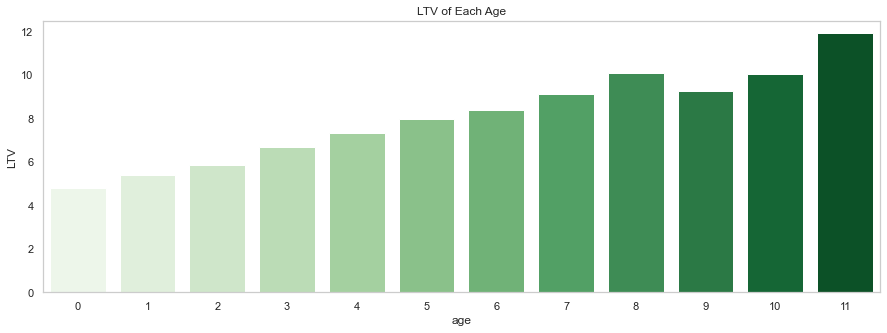

In [115]:
plt.figure(figsize=(15,5))
plt.title("LTV of Each Age")
plt.xlabel('Age in Months')
plt.ylabel('LTV')

sns.set_style("whitegrid")
sns.barplot(data=age_ltv, x='age', y='LTV', palette="Greens")

plt.show();

The barplot shows the average LTV of cohorts of different lifetime age. Typically the longer the lifetime, the higher is their average LTV. Compared to the heatmap where September 2017 cohort has an impressive cumulative LTV, their average is still lower than June 2017 cohort, although higher than July and August 2017 cohorts. 

### Sales Conclusions

1. In this section, we have analysed the orders made on Yandex Afisha website. From the orders data, we can find the conversion rate, typical conversion time, amount of orders made in different time periods, average purchase size, and lifetime value of each customer.
2. Around 16% of all users that visit the website, eventually makes a purchase. 
3. Users normally makes a purchase on the same day as or up to a week since their first visit.
4. The amount of orders made in daily, weekly and monthly time period align with their visits in respective time periods, therefore we can conclude that the higher the visit counts, more orders will be made.
5. Users normally spend a little less than \\$2 in the website, while on certain dates they can spend more than \\$3 on each order.

## Marketing Analysis
<a name="marketing"></a>

In this section, we will look into the marketing efforts done by Yandex Afisha in acquiring customers. The goal is to see if the marketing is effective and cost-efficient. Specifically, we will find out the following:
1. The amount of money spent on marketing overall, based on source and during a given period of time.
2. The customer acquisition cost per source.
3. The return of marketing investment.

In [116]:
costs['expense_month'] = costs['dt'].astype('datetime64[M]')

In [117]:
monthly_costs = costs.groupby('expense_month').sum().reset_index()

In [118]:
monthly_costs['order_month'] = monthly_costs['expense_month'].dt.strftime('%Y-%m')

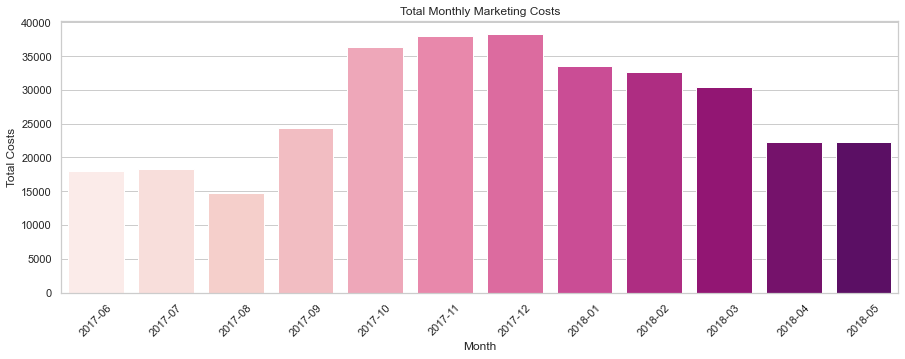

In [121]:
plt.figure(figsize=(15,5))
plt.title("Total Monthly Marketing Costs")

sns.set_style("whitegrid")
sns.barplot(data=monthly_costs, x='expense_month', y='costs', palette="RdPu").set_xticklabels(monthly_costs.order_month)

plt.xlabel('Month')
plt.ylabel('Total Costs')
plt.xticks(rotation=45)
plt.show();

In [122]:
print('Total marketing costs is $', int(costs.costs.sum()))
print('Average monthly marketing costs is $', int(monthly_costs['costs'].mean()))

Total marketing costs is $ 329131
Average monthly marketing costs is $ 27427


Each month, Yandex Afisha marketing department is spending between \\$15000 and \\$40000, with an average of \\$27427. In the following section we will find out if it pays off.

### Marketing Costs by Source

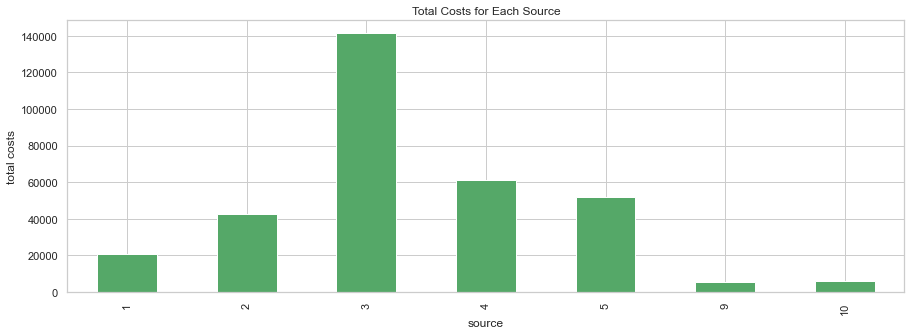

In [128]:
source_costs = costs.groupby('source_id')['costs'].sum().reset_index()

source_costs.plot(x='source_id', y='costs', kind='bar', figsize=(15, 5), color='g', legend=False)

plt.title("Total Costs for Each Source")
plt.xlabel('source')
plt.ylabel('total costs');

By looking at the bar chart, we can see that source 3 is costing the marketing department significantly more than any other sources, in total \\$140000. Source 9 and 10 spends equally low, less than \\$20000.  

#### Monthly Marketing Costs by Source

In [129]:
total_costs = costs.groupby(['expense_month','source_id']).sum().reset_index()

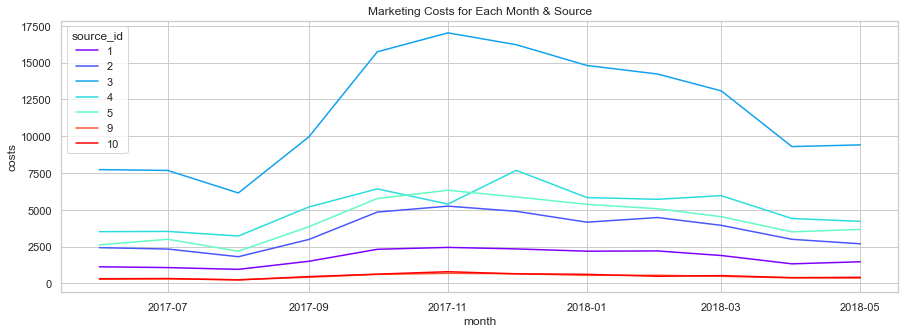

In [130]:
plt.figure(figsize=(15,5))
plt.title('Marketing Costs for Each Month & Source')
plt.xlabel('month')
plt.ylabel('costs')

sns.set_style('whitegrid')
sns.lineplot(data=total_costs, x='expense_month', y='costs', legend='full', hue='source_id', palette='rainbow')

plt.show();

Source 3 is costing the marketing department between \\$6000 to \\$17500 each month, while other sources always costs less than \\$7500. 

### Customer Acquisition Costs

In [131]:
cac = pd.merge(total_revenue, monthly_costs, left_on='first_order_month', right_on='expense_month')

In [132]:
cac['cac'] = cac['costs'] / cac['n_purchasers']

In [133]:
cac['cac'].describe()

count    78.000000
mean      9.319905
std       0.733719
min       7.437841
25%       8.905091
50%       9.288870
75%       9.485486
max      10.796015
Name: cac, dtype: float64

In [134]:
cac['tick_month'] = cac['month'].dt.strftime('%Y-%m')

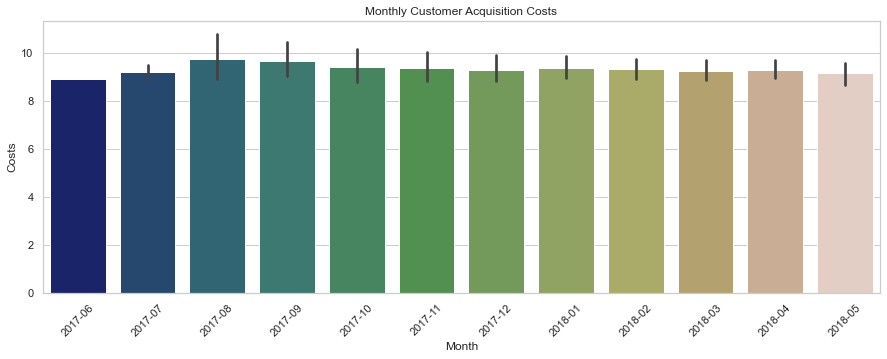

In [155]:
plt.figure(figsize=(15,5))
plt.title('Monthly Customer Acquisition Costs')

sns.set_style("whitegrid")
sns.barplot(data=cac, x='tick_month', y='cac', palette="gist_earth")

plt.xlabel('Month')
plt.ylabel('Costs')
plt.xticks(rotation=45)
plt.show();

On average, it costs the marketing department \\$9.3 to acquire a new customer. The bar chart shows that June 2017 and May 2018 are the cheapest months to acquire new customer and August is the most expensive. It makes sense as the previous charts show that the revenue in August is lower than other months.

### Return on Marketing Investment

In [156]:
cac['romi'] = cac['ltv'] / cac['cac']

In [157]:
romi = cac.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

sum_romi = romi.cumsum(axis=1)

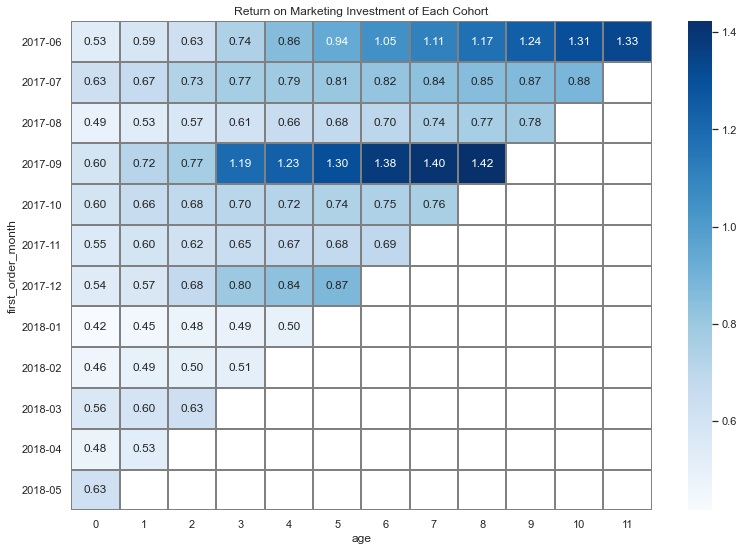

In [158]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Return on Marketing Investment of Each Cohort')

sns.heatmap(
    sum_romi, 
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    linecolor='gray', 
    cmap="Blues"
).set_yticklabels(sum_romi.index.strftime('%Y-%m'))

plt.show()

From the heatmap, we can see that only June 2017 and September 2017 cohorts get the acquisition costs paid off, It takes 6 months for June 2017 cohort and only 3 months for September 2017. It might benefit the team to look into these cohorts and compare it to other cohorts so they can make the acquisition costs paid off quicker.

### Costs Conclusions
1. In this section, we have analysed the marketing expenses, from which we could understand how much does the marketing department spend each month, how much to acquire new customers and whether the marketing investment is paying off.
2. The marketing department spends between \\$15000 and \\$40000 each month.
3. To acquire new customers, the marketing department spends approximately \\$9.
4. Out of 12 cohorts, only 2 cohorts got 100\% return on marketing investment or above, June and September 2017 cohorts. The rest are catching up to pay off the marketing investment at around 50-80% of the costs.

## Overall Conclusions
<a name="conclusion"></a>

1. In this report, we have analysed the datasets provided by Yandex Afisha, consisting of the server logs of website visits, order records and marketing expenses. Through this report we managed to get a closer look on the users' visit behaviour, timing for purchase and other business parameters such as LTV, CAC and ROMI.

2. Before going into the analysis, we have prepared the data by checking for any problems, changing the data types, categorising the data and adding relevant information into the dataset.

3. We performed exploratory data analysis on the following:
- average session length: most users spend 60 seconds on the Yandex Afisha website, with most sessions lasting 5-15 minutes.
- user retention: user retention rate is higher on a weekly (16.14\%) than monthly time frame (3.9\%), we have high retention rate for users in Sept'17 Cohort.
- time between visit and purchase: on average, 17 days elapsed from user's first session until their first order. But once we divide the time periods, most users place their first order or their first visit. 
- periodical orders: we found some random spikes in daily and weekly orders, possibly a famous act is coming to town on those certain days or weeks the business are doing much better than others. On monthly basis, the highest monthly orders are in October-December and the lowest are June-August. Based on the charts, we can also see that the amount of orders are aligned with the amount of user sessions.
- purchase amount: average daily purchase fluctuates between \\$1.75 to \\$2.75.
- marketing costs: source 3 is costing the marketing department the most, with total expense around \\$140000, more than 3x the highest monthly expense of \\$40000 in December.
- return on marketing investment: most of those costs aren't paying off yet, only 2 cohorts, June and September 2017 cohorts got 100% return on the marketing costs.

4. We also calculated various business metrics on Yandex Afisha users:
- conversion rate is 16.01%
- average purchase size is \\$1.83
- average lifetime value is around \\$7 to \\$18
- average customer acquisition costs is \\$9.3